начало всего это инициализация всего, извлечение данных из файлов итд

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
%config InlineBackend.figure_forman = 'svg'

In [3]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

In [4]:
TRAIN_DATASET_PATH = 'C:\\Users\\Dolas\\Desktop\\Обучение GB\\train.csv'
TEST_DATASET_PATH = 'C:\\Users\\Dolas\\Desktop\\Обучение GB\\test.csv'

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

идти я решил по пути того, что я уже писал на прошлых уроках
сами по себе данные уже разбиты на train и test, так что пошёл дальше смотреть что куда.

я сразу бахнул StandardScaler, а почему бы и нет, но столкнулся с очевидной проблемой: текст в данных. естественно, что теперь я должен как-то обрабатывать данные. это было понятно, что нужно обработать, но такая мелочь направила меня дальше.

In [6]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train_scaled = scaler.fit_transform(train_df)

я хоть и посмотрел все 4-5 часов последних двух вебинаров, но понял только то, что надо бы смотреть графики? таблицы? и смотреть что где плохо

In [7]:
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


по данным что я увидел, сходу есть проблема с NaN в LifeSquare и Healthcare_1<br>
буквенные данные в Ecology_2, Ecology_3, Shops_2 <br>
пробелы в LifeSquare можно заменить точными данными вычислив жил. площадь из других параметров площади жилья, сделаю в лоб вычтя из общей площади площадь кухни <br> а Healthcare_1 должен быть значением среднего по районам 

но нужно понять есть пропуски в квадратах кухни и общей площади или нет

In [8]:
train_df['Square'].isnull().sum()

0

In [9]:
train_df['KitchenSquare'].isnull().sum()


0

In [10]:
train_df['LifeSquare'].isnull().sum()

2113

In [11]:
train_df['LifeSquare'].fillna(train_df['Square'] -train_df['KitchenSquare'], inplace=True)

In [12]:
train_df['LifeSquare'].isnull().sum()

0

теперь все A и B поменяю на 0 и 1

In [13]:
train_df.replace({'Ecology_2': {'A': 0, 'B': 1}}, inplace=True)
train_df.replace({'Ecology_3': {'A': 0, 'B': 1}}, inplace=True)
train_df.replace({'Shops_2': {'A': 0, 'B': 1}}, inplace=True)

заполнение Healthcare_1

In [14]:
train_df['Healthcare_1'].isnull().sum()

4798

Healthcare_1 должен быть средним по району, если значение NaN

In [15]:
# # median по району
# train_df.fillna(
#     #вот тут надо найти среднюю, похоже на функцию
#     , inplace=True)



# def median_hc_by_district(X):
#     #берет в себя train_df и выдаёт медиану по району
    
#     return x[]median()


In [16]:
train_df['Healthcare_1'].median()

900.0

пока что могу себе позволить идти медианой общей по healthcare_1

In [17]:
train_df['Healthcare_1'].fillna(train_df['Healthcare_1'].median(), inplace=True)

In [18]:
train_df['Healthcare_1'].isnull().sum()
train_df.drop('Id', axis=1, inplace=True)

попробую построить модельку

In [19]:
X = train_df.drop(columns='Price')
y = train_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=100, )

In [20]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8, 8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,0.537930,-1.075318,-0.113793,0.121586,-0.248986,0.093130,-1.865481,-0.204052,-0.363941,0.102752,0.169911,-1.054411,-0.968355,-0.215159,-0.170292,-0.880609,-0.461507,0.304057
1,0.973156,1.356625,5.761185,1.352640,-0.208181,-0.670370,-1.422379,-0.204052,-0.958822,0.102752,0.169911,-1.396071,-1.280438,-0.341130,-0.170292,-0.880609,-0.876665,0.304057
2,0.354677,1.356625,1.192399,0.062547,0.240667,1.620129,0.645430,0.382780,-0.062856,0.102752,0.169911,1.451093,1.726134,-0.005208,1.262457,0.448837,-0.253928,0.304057
3,-0.653215,0.140653,-0.536242,-0.143762,-0.044964,-1.052120,-1.126978,-0.570822,-0.004821,0.102752,0.169911,0.312228,0.221601,-0.299139,0.208650,-0.215886,-0.876665,0.304057
4,-0.447055,-1.075318,-1.034494,-0.229718,-0.004160,-1.433870,-0.536175,-0.277406,0.270734,0.102752,-5.885431,0.426114,0.142270,0.078772,-0.264023,1.778283,-0.669086,0.304057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,-0.538682,-1.075318,-0.735209,-0.002321,-0.248986,1.047504,0.940831,-0.204052,0.775122,0.102752,0.169911,-0.883581,-0.854848,-0.341130,-0.170292,-0.880609,-0.669086,0.304057
6696,1.110596,0.140653,-0.448228,-0.140963,-0.004160,0.093130,-0.536175,-0.326309,-0.896759,0.102752,0.169911,0.596944,0.114081,-0.299139,1.407071,0.448837,-0.046349,0.304057
6697,1.568728,0.140653,-0.243872,-0.095667,-0.004160,0.284005,-0.536175,-0.301857,1.803892,0.102752,0.169911,0.312228,0.310660,-0.299139,-0.170292,-0.880609,-0.876665,0.304057
6698,-0.378336,1.356625,1.711124,0.510762,-0.208181,2.001879,1.827034,0.749551,-0.414547,0.102752,0.169911,1.621923,2.083371,-0.173169,-0.170292,-0.215886,1.406704,0.304057


R2:	0.522
RMSE:	64432.43
MSE:	4151537979.239


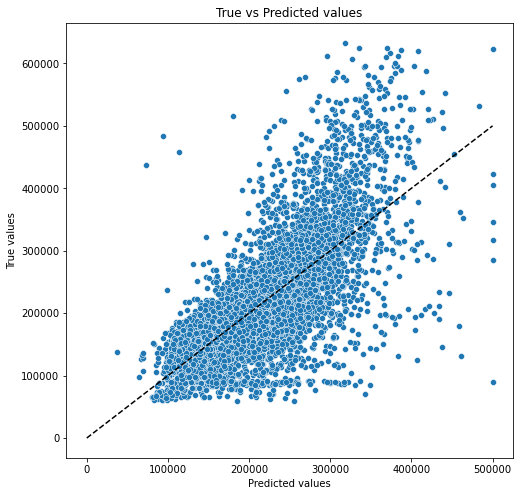

In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)
# Постпроцессинг
y_train_preds = np.clip(y_train_preds, a_min=10000, a_max=500000)

evaluate_preds(y_train, y_train_preds)

посмотрев на это чудо, я решил просто потыкать всё, что есть в уроках и посмотреть как оно будет

R2:	0.703
RMSE:	50788.345
MSE:	2579456028.576


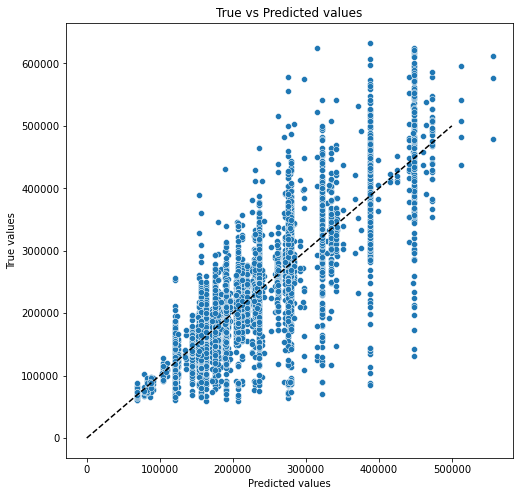

In [23]:
dt_model = DecisionTreeRegressor(criterion='mse', 
                                 max_depth=7, # глубина дерева  
                                 min_samples_leaf=3, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42)
dt_model.fit(X_train, y_train)

y_train_preds = dt_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.616
RMSE:	57099.439
MSE:	3260345907.182


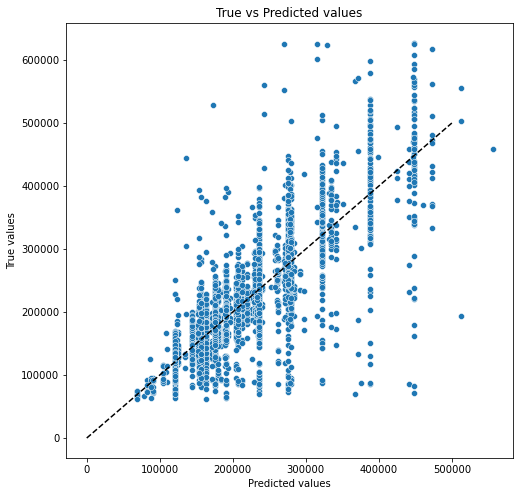

In [24]:
y_test_preds = dt_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

последние три графика выглядят как-то очень странно вот эти вот данные которые в линию выстроились, я их трогать конечно же не стал, но пусть будет 
<br> и пошёл смотреть что будет дальше

In [25]:
from sklearn.ensemble import BaggingRegressor
BaggingRegressor(DecisionTreeRegressor(), n_estimators=3)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=3)

R2:	0.727
RMSE:	48679.957
MSE:	2369738166.41


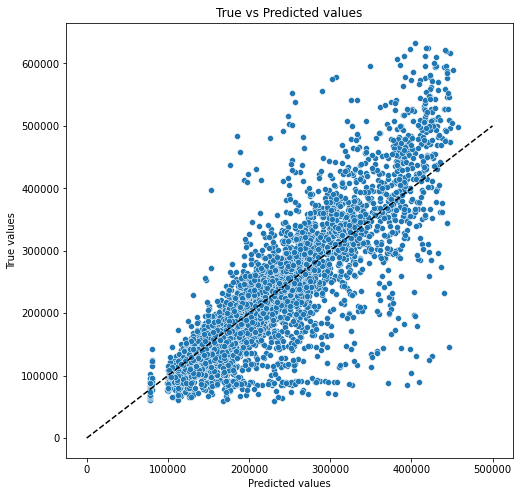

In [26]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=20, # глубина дерева  
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42, 
                                 n_estimators=100  # кол-во деревьев
                                 )

rf_model.fit(X_train, y_train)
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.895
RMSE:	30268.097
MSE:	916157701.286


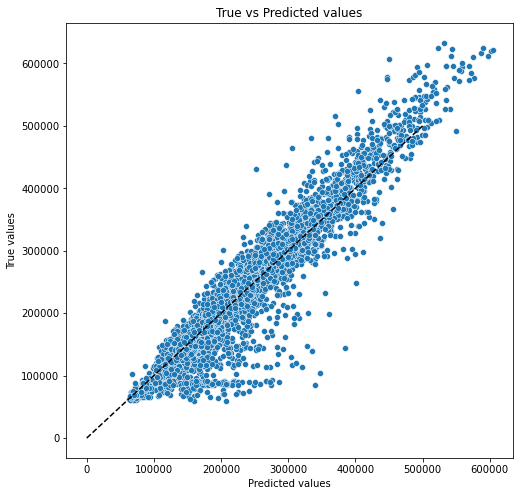

In [27]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=100)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.736
RMSE:	47378.73
MSE:	2244744038.681


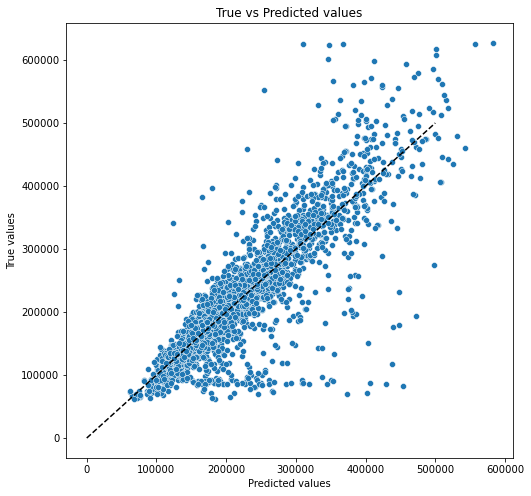

In [28]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

73% выглядят недурственно, но ещё есть модели, которые можно потрогать

In [29]:
final_model = GradientBoostingRegressor(criterion='mse',
                                        max_depth=7,
                                        min_samples_leaf=10,
                                        random_state=42,
                                        n_estimators=400)

final_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', max_depth=7, min_samples_leaf=10,
                          n_estimators=400, random_state=42)

R2:	0.963
RMSE:	17860.593
MSE:	319000798.482


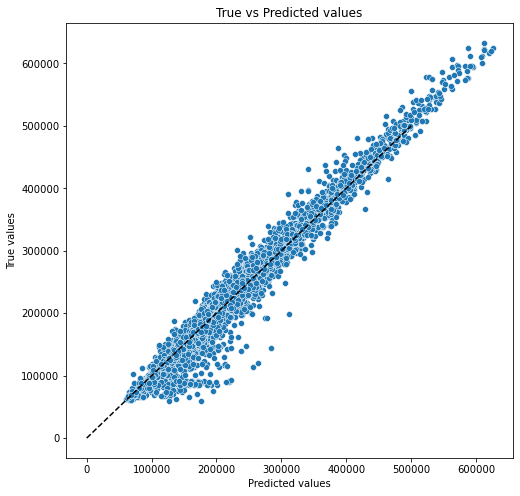

In [30]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(np.squeeze(y_train.values), y_train_preds)

а это уже какое-то переобучение 

R2:	0.727
RMSE:	48174.185
MSE:	2320752114.394


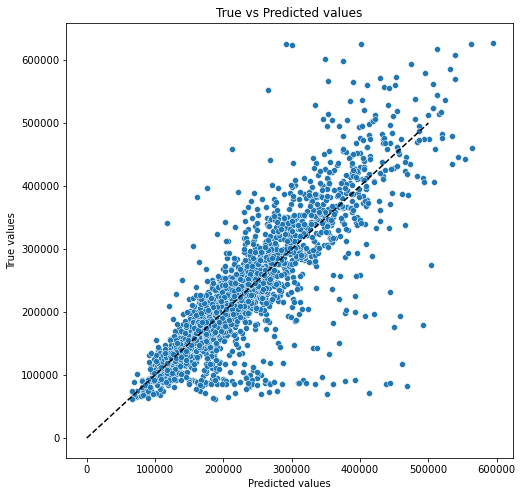

In [31]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

нужно попробовать отправить модель на 73%, посмотреть как отреагирует сайт, а потом уже заниматься допиливанием
но перед этим нужно обработать тестовую модель

In [33]:
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


In [38]:
test_df['LifeSquare'].fillna(test_df['Square'] - test_df['KitchenSquare'], inplace=True)
test_df.replace({'Ecology_2': {'A': 0, 'B': 1}}, inplace=True)
test_df.replace({'Ecology_3': {'A': 0, 'B': 1}}, inplace=True)
test_df.replace({'Shops_2': {'A': 0, 'B': 1}}, inplace=True)
test_df['Healthcare_1'].fillna(test_df['Healthcare_1'].median(), inplace=True)
test_df.drop('Id', axis=1, inplace=True)

In [39]:
predictions = gb_model.predict(test_df)
predictions

array([167362.88562461, 119881.59609159, 145857.79790032, ...,
       145913.29795048, 197314.16401123, 268597.28599981])

In [41]:
submit = pd.read_csv('C:\\Users\\Dolas\\Desktop\\Обучение GB\\sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [42]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,167362.885625
1,5925,119881.596092
2,960,145857.797900
3,3848,126138.476835
4,746,192798.493880


In [43]:
submit.shape

(5000, 2)

In [44]:
submit.to_csv('gb_submit.csv', index=False)